선형 회귀를 통한 2024~2030 경제 성장 및 전력 사용 예측

In [3]:
! pip install tabulate

In [4]:
! pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [5]:
! pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl (11.0 MB)


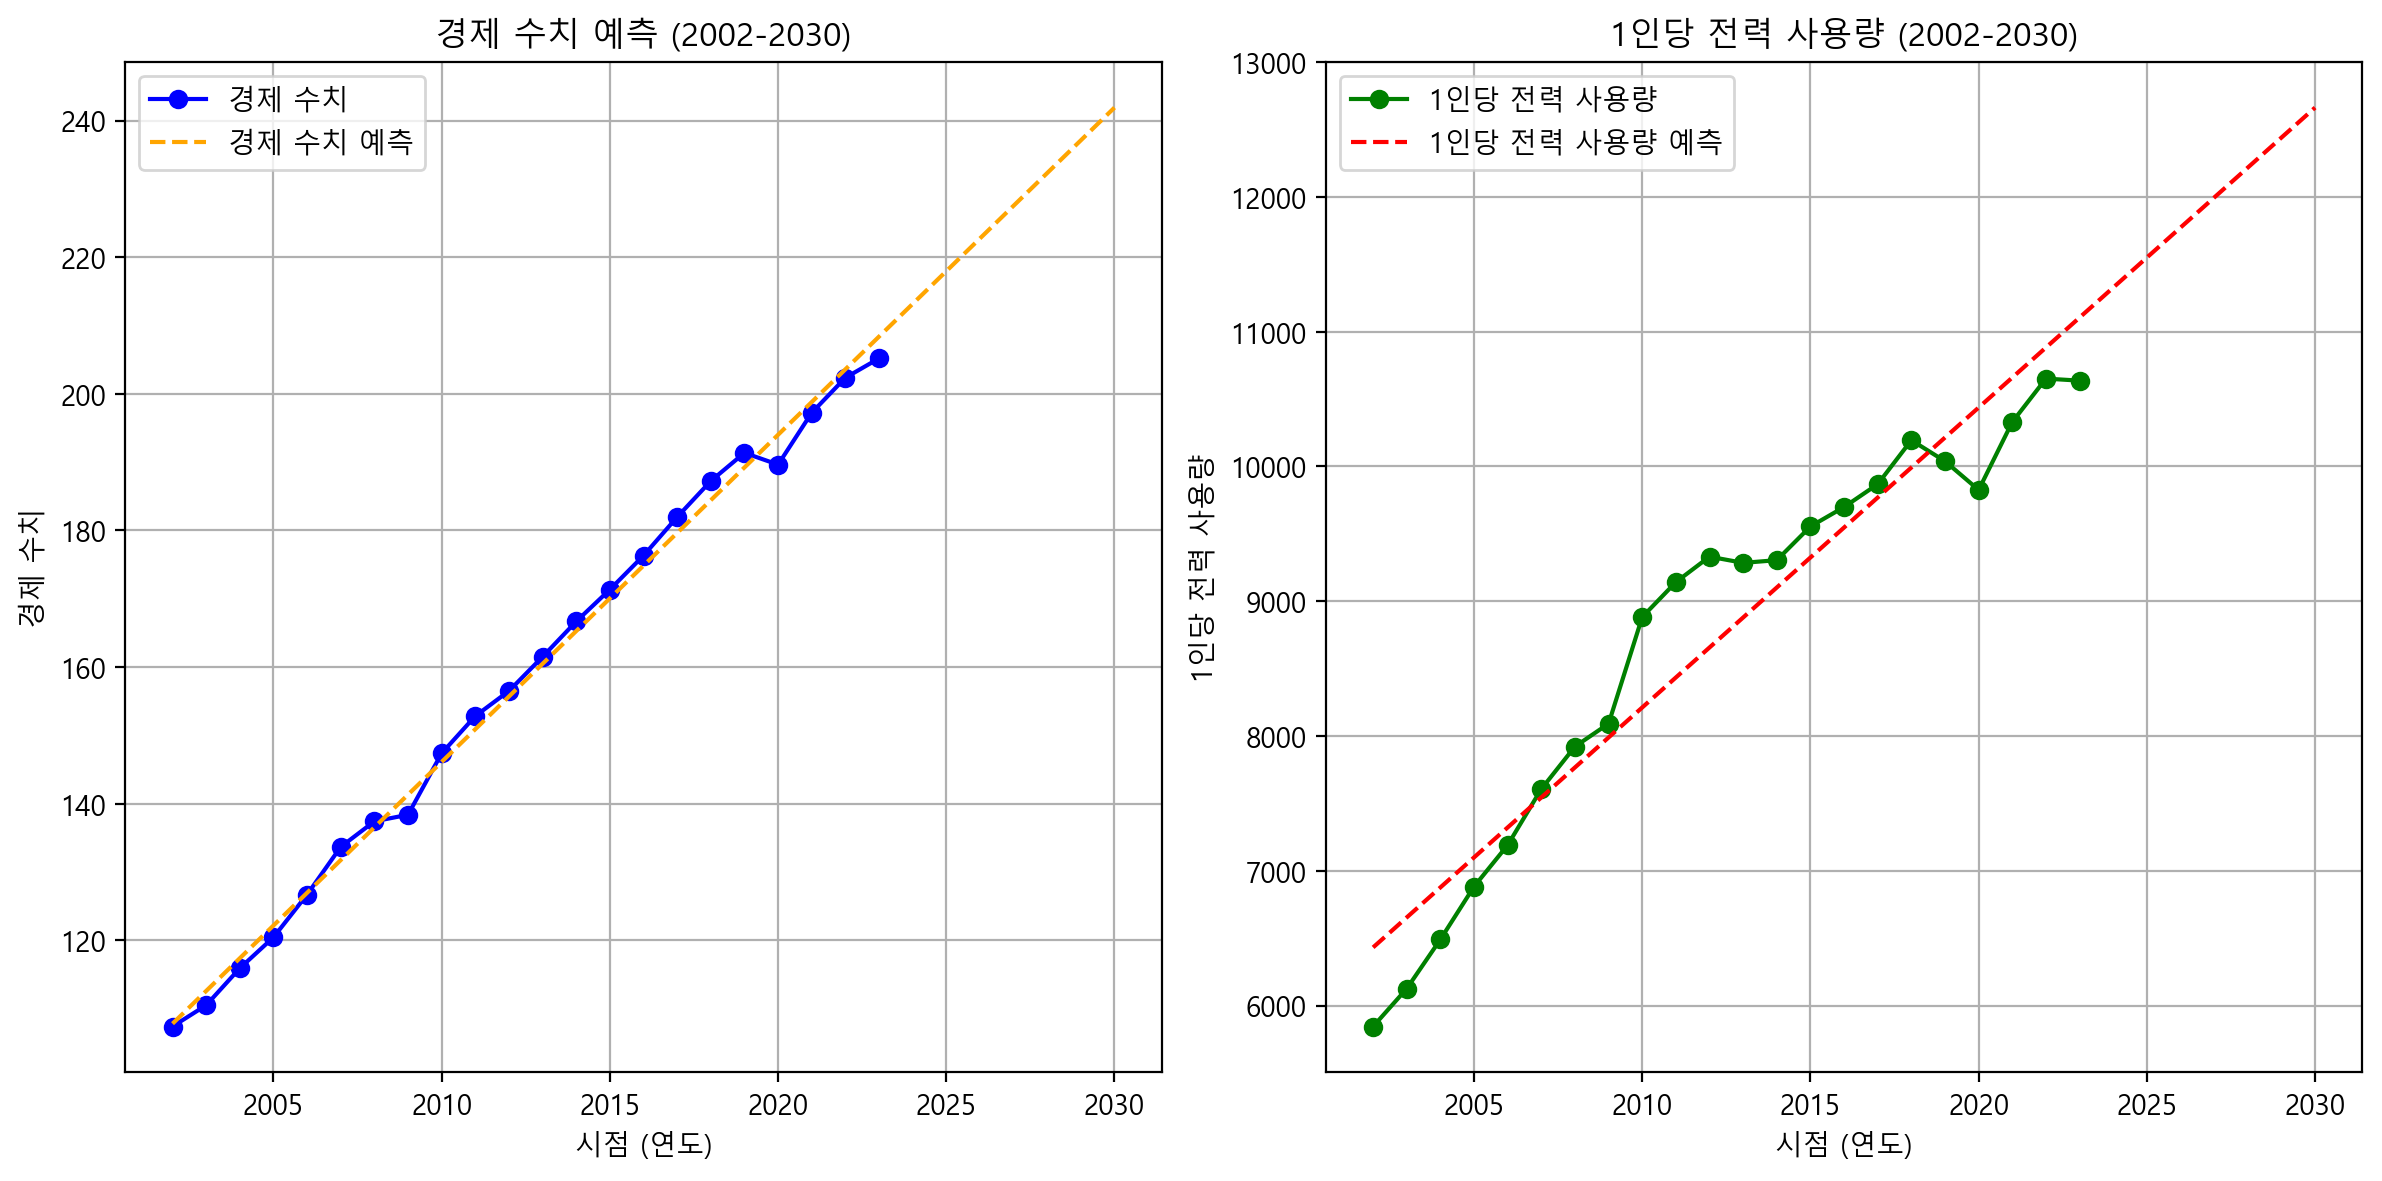

+--------+-------------+------------------------------+---------------+
|   연도 |   경제 수치 |   전년도 대비 경제 성장율(%) |   전력 사용량 |
+========+=============+==============================+===============+
|   2024 |       208.4 |                          2.4 |       11105   |
+--------+-------------+------------------------------+---------------+
|   2025 |       213.2 |                          2.3 |       11327.5 |
+--------+-------------+------------------------------+---------------+
|   2026 |       217.9 |                          2.2 |       11550   |
+--------+-------------+------------------------------+---------------+
|   2027 |       222.7 |                          2.2 |       11772.6 |
+--------+-------------+------------------------------+---------------+
|   2028 |       227.5 |                          2.1 |       11995.1 |
+--------+-------------+------------------------------+---------------+
|   2029 |       232.3 |                          2.1 |       12217.6 |
+--------+---

In [6]:
%config InlineBackend.figure_format = 'retina' # 시각화 데이터를 더 선명하게 함

import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 한글 및 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False



# '연도별_전력수급_실적.csv' 파일을 열고 데이터 읽기
f = open('연도별_전력수급_실적.csv', encoding='cp949')
data = csv.reader(f)
next(data)  # 헤더를 건너뛰기

growth_rate = []
power_per_capita = []

for row in data:
    growth_rate.append(float(row[1]))  # '경제성장률 (%)' (두 번째 열)
    power_per_capita.append(float(row[-1]))  # '인구1인당전력소비량 (kWh/년)' (마지막 열)


# 데이터 정의
years = np.arange(2002, 2024)  # 2002~2023

economic = np.arange(22, dtype = float)

economic_2001 = 100

economic[0] = economic_2001 + economic_2001 / 100.0 * growth_rate[0]

for i in range(1, 22):
    economic[i] = economic[i - 1] + economic[i - 1] / 100.0 * growth_rate[i]

# 선형 회귀 모델 생성 및 학습
model_economic = LinearRegression()
model_power = LinearRegression()

# 입력 데이터 reshape
years_reshape = years.reshape(-1, 1)

# 학습
model_economic.fit(years_reshape, economic)
model_power.fit(years_reshape, power_per_capita)

# 2030년까지 예측
future_years = np.arange(2002, 2031).reshape(-1, 1)
predicted_economic = model_economic.predict(future_years)
predicted_power = model_power.predict(future_years)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 경제 수치 그래프
plt.subplot(1, 2, 1)
plt.plot(years, economic, 'o-', label='경제 수치', color='blue')
plt.plot(future_years, predicted_economic, '--', label='경제 수치 예측', color='orange')
plt.title('경제 수치 예측 (2002-2030)')
plt.xlabel('시점 (연도)')
plt.ylabel('경제 수치')
plt.legend()
plt.grid(True)

# 1인당 전력 사용량 그래프
plt.subplot(1, 2, 2)
plt.plot(years, power_per_capita, 'o-', label='1인당 전력 사용량', color='green')
plt.plot(future_years, predicted_power, '--', label='1인당 전력 사용량 예측', color='red')
plt.title('1인당 전력 사용량 (2002-2030)')
plt.xlabel('시점 (연도)')
plt.ylabel('1인당 전력 사용량')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()




from tabulate import tabulate

# 데이터
years = list(range(2024, 2032))

# 전년도 경제 수치
previous_economic = predicted_economic[-9]

# 표 데이터 구성
table_data = []
for year, econ, power in zip(years, predicted_economic[-8: -1], predicted_power[-8: -1]):
    growth_rate = ((econ - previous_economic) / previous_economic) * 100
    row = [
        year,  # 연도
        round(econ, 1),  # 경제 수치
        round(growth_rate, 1),  # 경제 성장률(%)
        round(power, 1)  # 전력 사용량
    ]
    table_data.append(row)
    previous_economic = econ  # 전년도 경제 수치 갱신

# 표 출력
headers = ["연도", "경제 수치", "전년도 대비 경제 성장율(%)", "전력 사용량"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

